In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


ColorBuds Sales - Statistic: 1.4762929312496371, P-value: 0.4779990826547623
ColorBuds Sales appear to follow a normal distribution.
Gamer Headphones Sales - Statistic: 6.6387384814919255, P-value: 0.03617564268058013
Gamer Headphones Sales do not follow a normal distribution.
Pearson Correlation Coefficient: -0.9303811023916251
P-value: 0.0002737249204492521
The correlation is statistically significant.


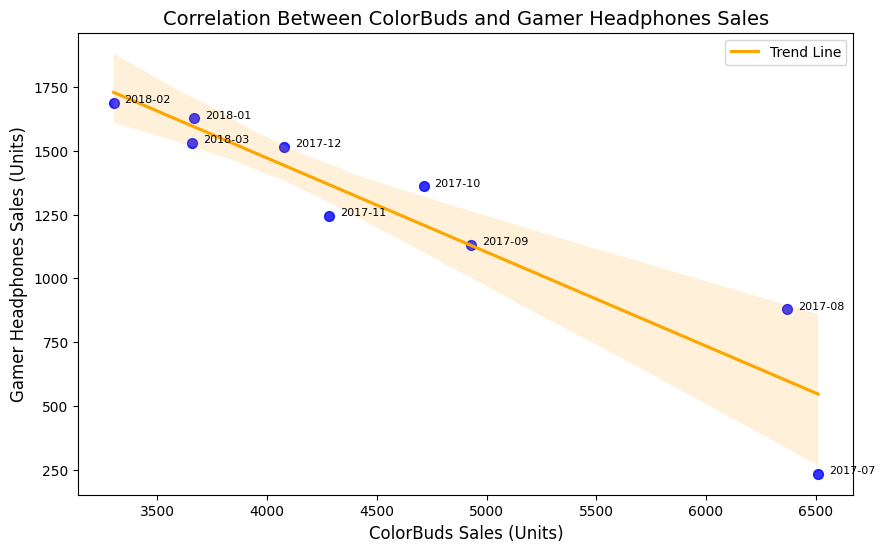

In [11]:
# Read data from the CSV file (replace 'data.csv' with your actual file name)
dataset_path = '/content/colorbuds_vs_gamer.csv'
data = pd.read_csv(dataset_path)

# Extract columns for analysis
colorbuds_sales = data['Colorbuds_Sales']
gamer_headphones_sales = data['Gamer_Headphones_Sales']

# Normality test for ColorBuds Sales
stat_colorbuds, p_colorbuds = normaltest(colorbuds_sales)
print(f"ColorBuds Sales - Statistic: {stat_colorbuds}, P-value: {p_colorbuds}")
if p_colorbuds > 0.05:
    print("ColorBuds Sales appear to follow a normal distribution.")
else:
    print("ColorBuds Sales do not follow a normal distribution.")

# Normality test for Gamer Headphones Sales
stat_gamer, p_gamer = normaltest(gamer_headphones_sales)
print(f"Gamer Headphones Sales - Statistic: {stat_gamer}, P-value: {p_gamer}")
if p_gamer > 0.05:
    print("Gamer Headphones Sales appear to follow a normal distribution.")
else:
    print("Gamer Headphones Sales do not follow a normal distribution.")

# Pearson correlation between the two variables
pearson_corr, pearson_p = pearsonr(colorbuds_sales, gamer_headphones_sales)
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {pearson_p}")
if pearson_p < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Create a scatter plot with a trend line
plt.figure(figsize=(10, 6))

# Plot scatter plot and trend line with Seaborn
sns.regplot(
    x='Colorbuds_Sales',
    y='Gamer_Headphones_Sales',
    data=data,
    scatter_kws={'color': 'blue', 's': 50, 'label': 'Data Points'},  # Customize scatter points
    line_kws={'color': 'orange', 'label': 'Trend Line'},  # Customize trend line
    ci=95  # Confidence interval of 95%
)

# Add labels to the data points
for i, row in data.iterrows():
    plt.text(
        row['Colorbuds_Sales'] + 50, row['Gamer_Headphones_Sales'],  # Adjust text position
        row['Month'], fontsize=8, color='black'  # Display month as a label
    )

# Add titles, labels, and legend
plt.title("Correlation Between ColorBuds and Gamer Headphones Sales", fontsize=14)
plt.xlabel("ColorBuds Sales (Units)", fontsize=12)
plt.ylabel("Gamer Headphones Sales (Units)", fontsize=12)
plt.legend()  # Show legend
plt.show()
